In [1]:
import bz2, pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
%matplotlib inline

fech = 100 #fps 750 max for ~200x200

In [2]:
path = 'stability_without_clamp'
with bz2.BZ2File(path,'r') as save_file: 
    save_dict = pickle.load(save_file,encoding='latin1') 

In [3]:
save_dict.keys()

dict_keys(['complex_images', 'holo_images'])

In [4]:
imgs = save_dict['complex_images']
nb_imgs = len(imgs)
imgs[0].shape

(200, 192)

In [5]:
## to save video
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')
writer = FFMpegWriter(fps=15, metadata=metadata)

(-0.5, 191.5, 199.5, -0.5)

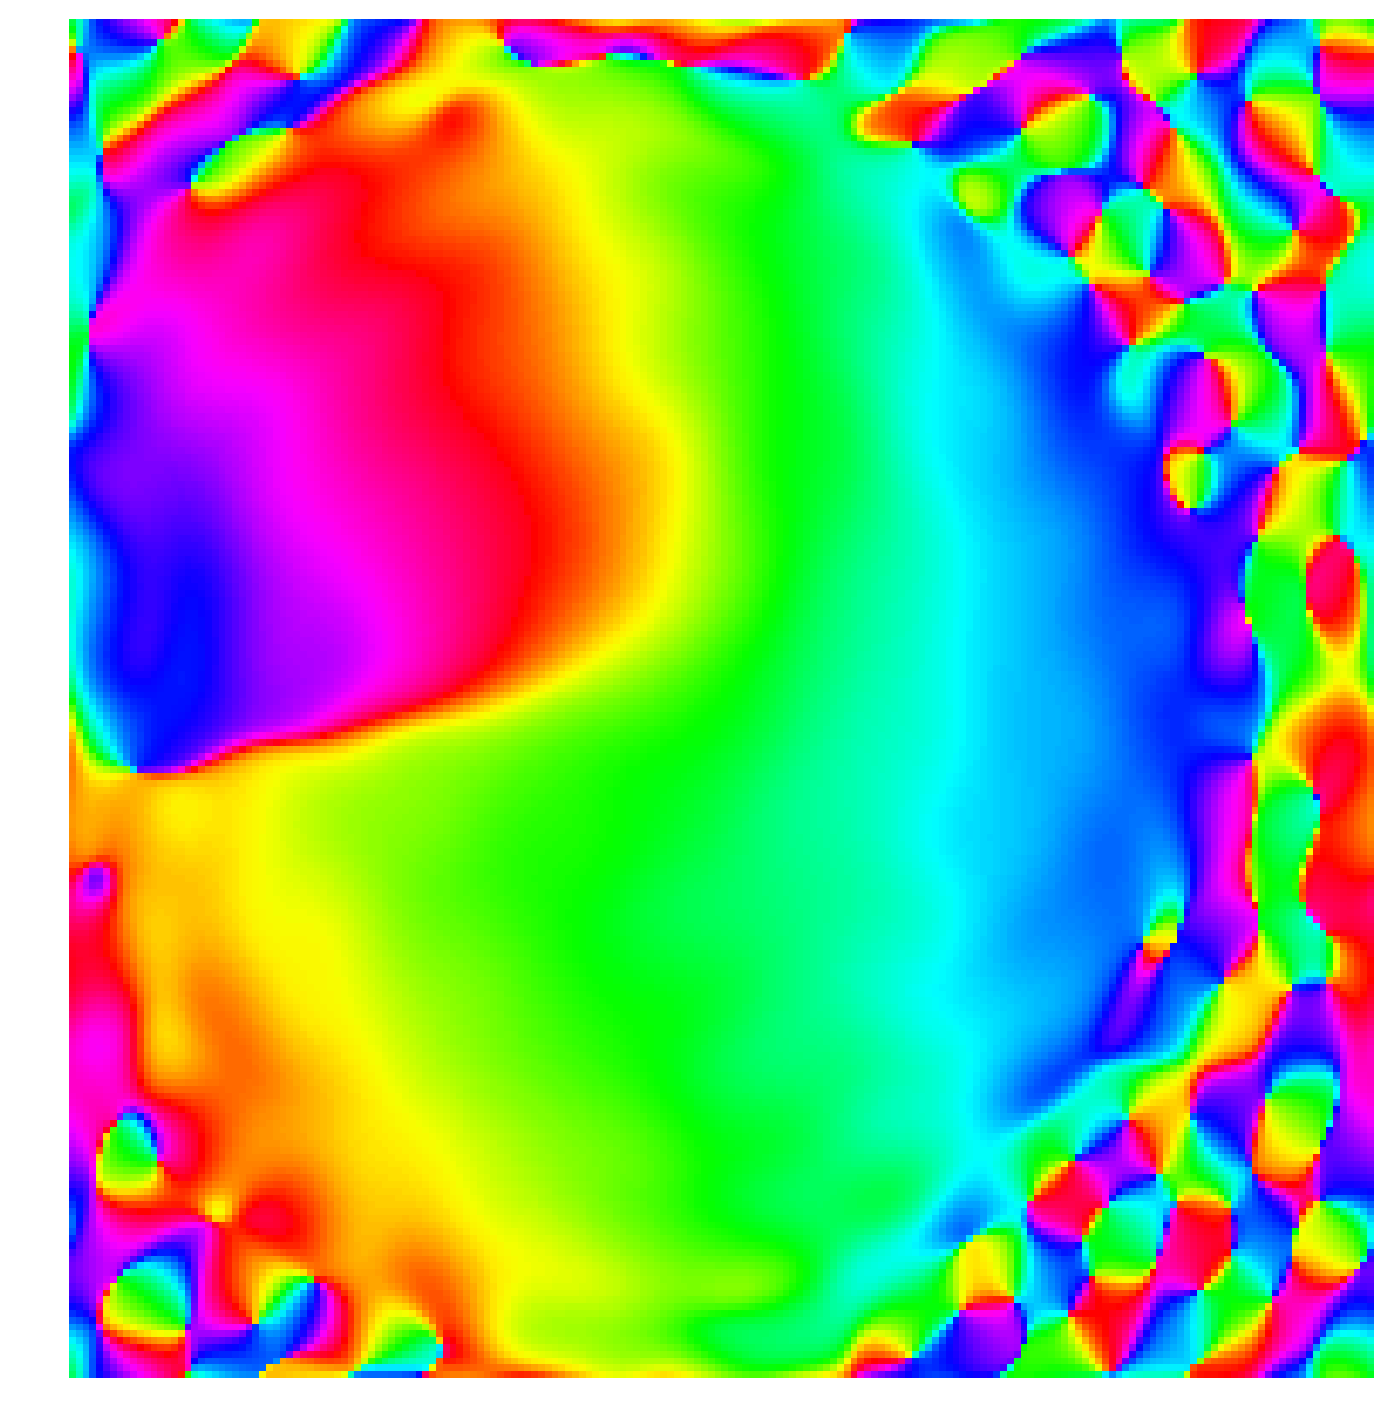

In [6]:
fig = plt.figure(figsize=(12, 12), dpi=150);
ax = fig.add_subplot(111)
ax.set_axis_off()
im = ax.imshow(np.angle(imgs[0]),cmap = 'hsv',aspect='equal',interpolation = 'nearest')
plt.axis('off')

In [7]:
with writer.saving(fig, path+".mp4", 100):
    for i in range(len(imgs)):
        if (i%int(1.*nb_imgs/100) == int(1.*nb_imgs/100)-1):
            print(f"{int(100.*i/len(imgs))}%")
        im.set_data(np.angle(imgs[i]))
        writer.grab_frame()
        fig.canvas.draw()


0%
1%
2%
3%
4%
5%
6%
7%
7%
8%
9%
10%
11%
12%
13%
14%
15%
16%
16%
17%
18%
19%
20%
21%
22%
23%
24%
25%
25%
26%
27%
28%
29%
30%
31%
32%
33%
34%
35%
35%
36%
37%
38%
39%
40%
41%
42%
43%
44%
44%
45%
46%
47%
48%
49%
50%
51%
52%
53%
53%
54%
55%
56%
57%
58%
59%
60%
61%
62%
62%
63%
64%
65%
66%
67%
68%
69%
70%
71%
71%
72%
73%
74%
75%
76%
77%
78%
79%
80%
80%
81%
82%
83%
84%
85%
86%
87%
88%
89%
89%
90%
91%
92%
93%
94%
95%
96%
97%
98%
98%
99%


In [8]:
pos = [imgs[0].shape[0]//2,imgs[0].shape[1]//2]

time_evolution =[np.angle(img[pos[0],pos[1]]) for img in imgs]
np.savez(path+'_time_evol',time_evolution=time_evolution)

In [9]:
time_evolution_1 = np.load('stability_with_clamp_time_evol.npz')['time_evolution']
time_evolution_2 = np.load('stability_without_clamp_time_evol.npz')['time_evolution']

<IPython.core.display.Javascript object>


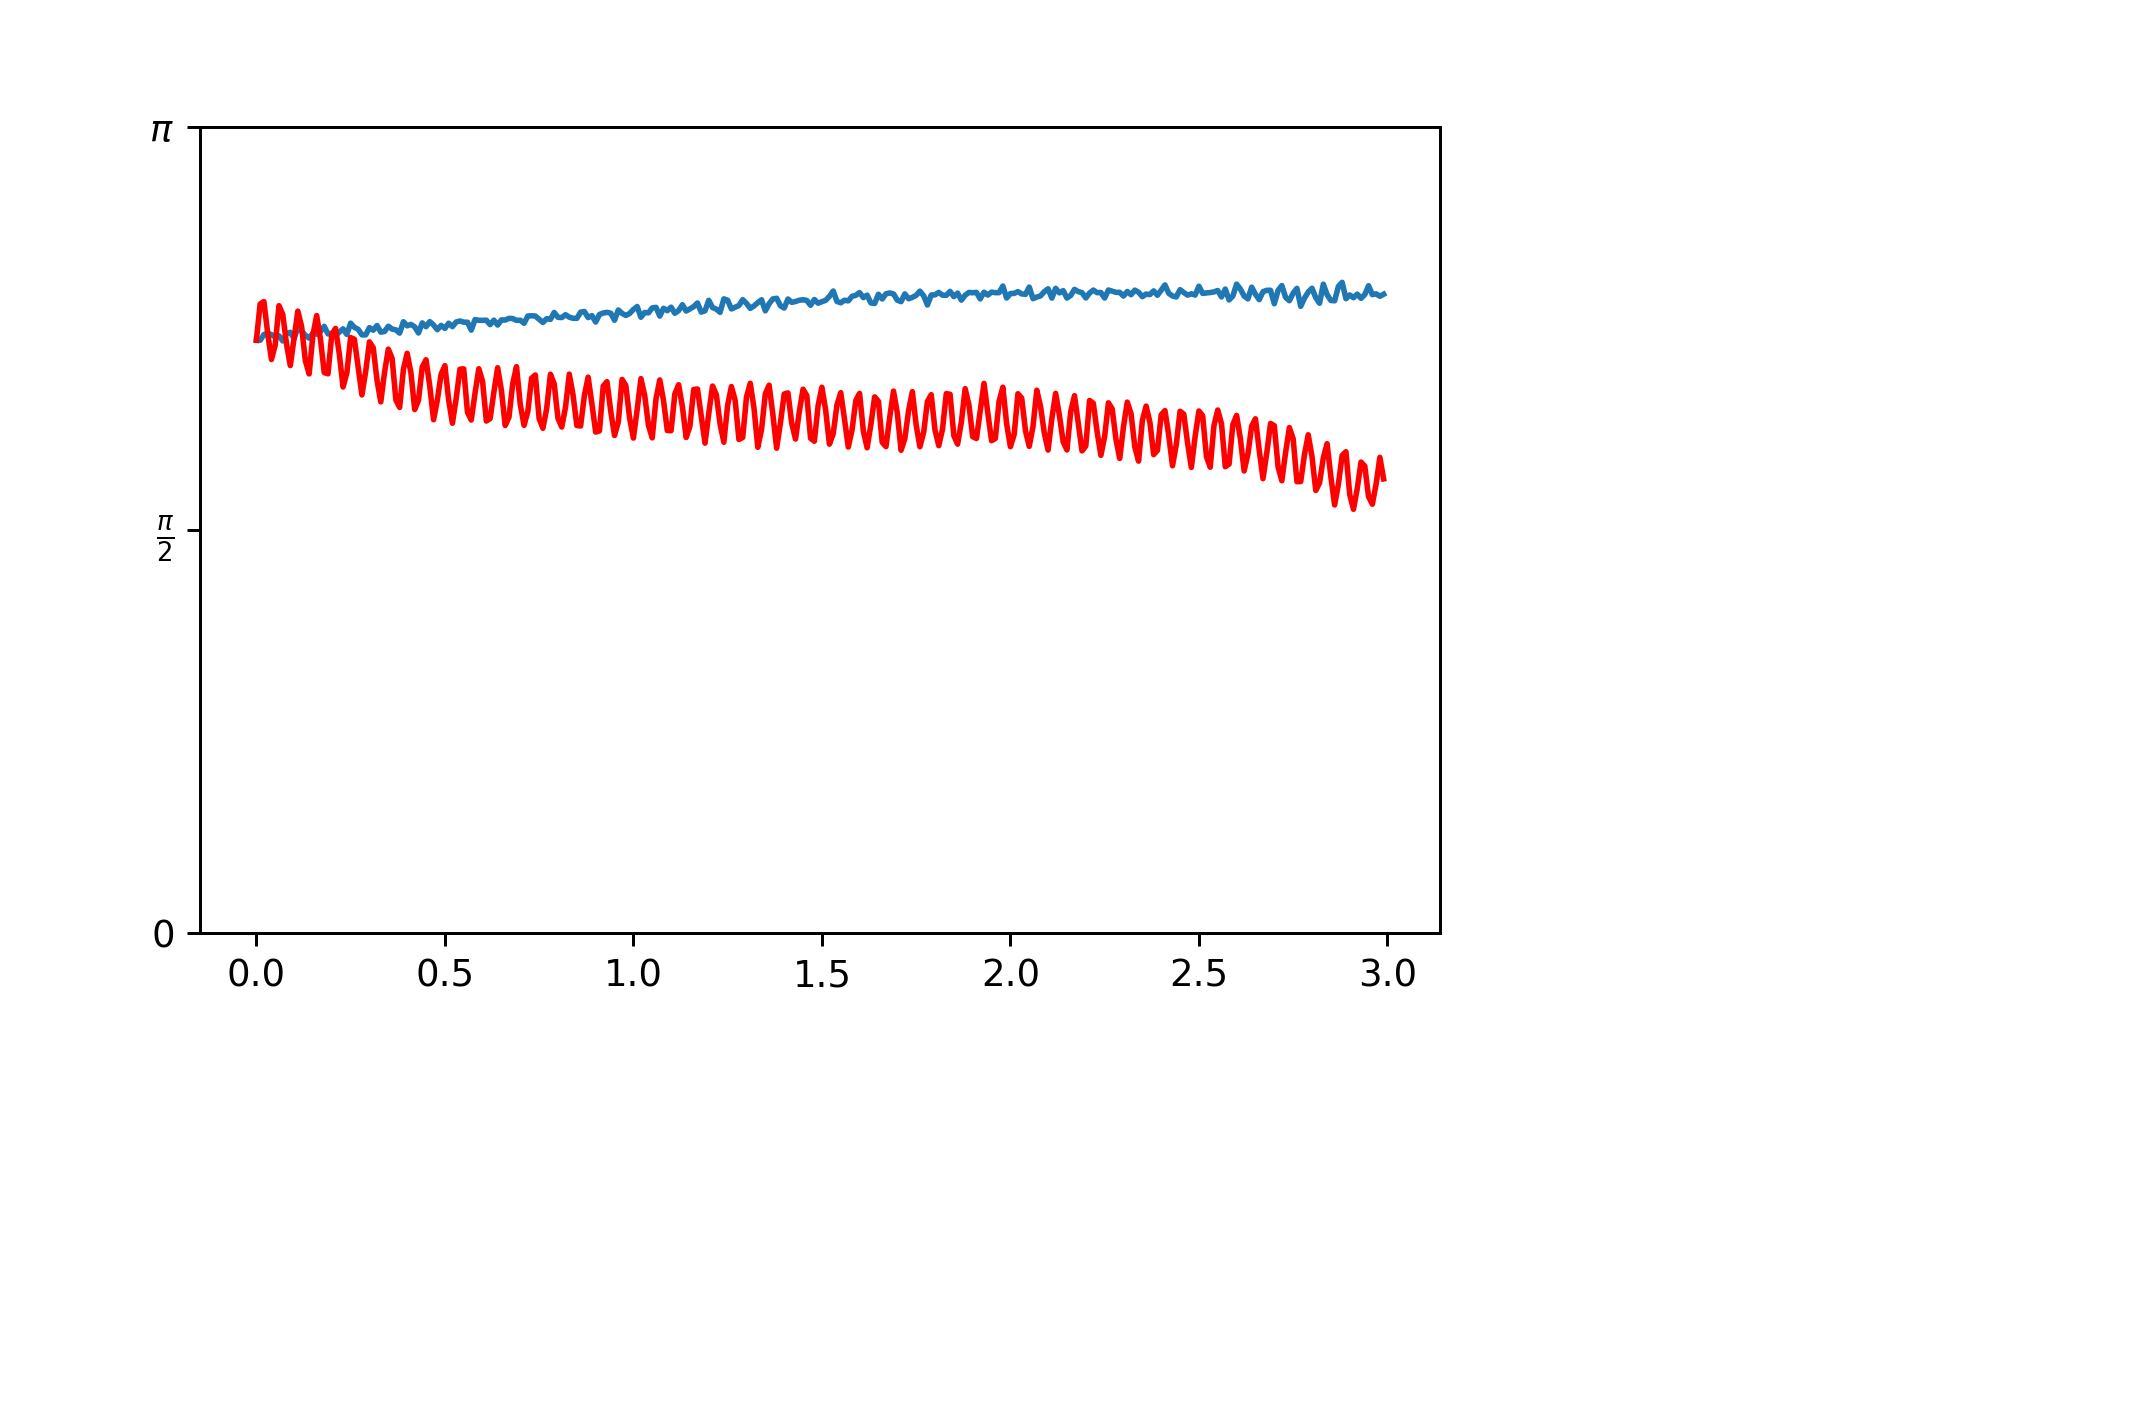

In [11]:
%matplotlib notebook
ind0 = 200
nb_points = 300
ref = ind0#nb_points//2
time = np.arange(nb_points)/fech
plt.figure(figsize = [6,4],dpi = 200)
plt.plot(time,time_evolution_1[ind0:ind0+nb_points])
plt.plot(time,time_evolution_2[ind0:ind0+nb_points]-time_evolution_2[ref]+time_evolution_1[ref],'r')
#plt.ylim=[-np.pi,np.pi]
# plt.yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
#            ['$0$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])

plt.yticks([-np.pi, -np.pi/2, 0],
           ['$0$', r'$\frac{\pi}{2}$', r'$\pi$'])
plt.savefig(path+'_time_evol.png')